# Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

# Описание данных

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
Данные за 2016 год могут быть неполными.

## Открытие файла и изучение общей информации

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
data = pd.read_csv('/datasets/games.csv')

In [3]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<b> В данных можно заметить пропуски, неверно указанные типы данных и верхний регистр в названиях столбцов.

## Подготовка данных

### Приведение столбцов к нижнему регистру

In [5]:
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [6]:
for i in ['name', 'platform', 'genre', 'rating']:
    data[i] = data[i].str.lower()

### Изменение типов данных

In [7]:
data['year_of_release'] = data['year_of_release'].astype('Int64')
data['year_of_release'].dtype

Int64Dtype()

In [8]:
data['critic_score'] = data['critic_score'].astype('Int64')
data['critic_score'].dtype

Int64Dtype()

In [9]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Встречается значение tbd (to be determined), которое означает 'предстоит определить' или  еще не определено. Значит все такие значения можно заменить на NaN.

In [10]:
data['user_score'] = data['user_score'].replace('tbd', np.nan)
data['user_score'] = data['user_score'].astype('float')
data['user_score'].dtypes

dtype('float64')

### Удаление пропусков

In [11]:
data.query('name.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,1993,NaN,1.78,0.53,0.00,0.08,<NA>,NaN,NaN
14244,NaN,gen,1993,NaN,0.00,0.00,0.03,0.00,<NA>,NaN,NaN


У этих строчек отсутсвует много данных и их всего две, поэтому можем их удалить.

In [12]:
data = data.dropna(subset=['name'])

У игр с одинаковым названием, но на разную платформу, вероятно, один и тот же год выпуска. Заполним года по такому принципу, оставшиеся пропуски удалим.

In [13]:
data.query('name=="call of duty 3"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
557,call of duty 3,x360,2006,shooter,1.49,0.92,0.02,0.27,82,6.5,t
719,call of duty 3,wii,<NA>,shooter,1.17,0.84,0.00,0.23,69,6.7,t
1255,call of duty 3,ps3,2006,shooter,0.60,0.62,0.03,0.26,80,6.9,t
1915,call of duty 3,ps2,2006,shooter,0.89,0.03,0.00,0.15,82,7.4,t


In [14]:
data['year_of_release'] = data.groupby('name')['year_of_release'].ffill()

In [15]:
data.query('name=="call of duty 3"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
557,call of duty 3,x360,2006,shooter,1.49,0.92,0.02,0.27,82,6.5,t
719,call of duty 3,wii,2006,shooter,1.17,0.84,0.00,0.23,69,6.7,t
1255,call of duty 3,ps3,2006,shooter,0.60,0.62,0.03,0.26,80,6.9,t
1915,call of duty 3,ps2,2006,shooter,0.89,0.03,0.00,0.15,82,7.4,t


In [16]:
data.isna().sum()

name                  0
platform              0
year_of_release     189
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating             6764
dtype: int64

Осталось всего 189 пропущеных значений, что составляет примерно 1% от данных, удалим их.

In [17]:
data = data.dropna(subset=['year_of_release'])

Рейтинг ESRB проставляется только в регионах Северной Америки, поэтому пропуски в этом столбце заменим на значение "nr" - no rating

In [18]:
data['rating'] = data['rating'].fillna('nr')

In [19]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8487
user_score         9018
rating                0
dtype: int64

Заполнение пропусков в столбцах с различными оценками может привести к ухудшению чистоты исследования, поэтому оставим их пустыми.

### Создание столбца с общими продажами

In [20]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [21]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76,8.0,e,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,<NA>,NaN,nr,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82,8.3,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80,8.0,e,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,<NA>,NaN,nr,31.38


In [22]:
# проверим дубликаты
data.duplicated().sum()

0

In [23]:
# проверим неявные дубликаты
data[['name', 'platform', 'year_of_release']].duplicated().sum()

2

In [24]:
# удалим неявные дуюликаты
# data = data[['name', 'platform', 'year_of_release']].drop_duplicates().reset_index(drop=True)

<b> Все пропуски, кроме оценок игр были заполнены. Типы данных исправлены на подходящий. Все строки приведены к нижнему регистру. Добавлен столбец с общими продажами. <b> <br> Разные компании, занимающиеся оценкой игр, появились в разное время и они могут оценивать только определенный регион, в связи с этим могли появиться пропуски до определенного года, или в определенном регионе.

In [25]:
# Посмотрим, что осталось
temp = data.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
    print('-'* 25)
    print(col_l, temp[col_l].sort_values().unique())  
    print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%') 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16524 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16524 non-null  object 
 1   platform         16524 non-null  object 
 2   year_of_release  16524 non-null  Int64  
 3   genre            16524 non-null  object 
 4   na_sales         16524 non-null  float64
 5   eu_sales         16524 non-null  float64
 6   jp_sales         16524 non-null  float64
 7   other_sales      16524 non-null  float64
 8   critic_score     8037 non-null   Int64  
 9   user_score       7506 non-null   float64
 10  rating           16524 non-null  object 
 11  total_sales      16524 non-null  float64
dtypes: Int64(2), float64(6), object(4)
memory usage: 1.7+ MB
None
-------------------------
name [' beyblade burst' ' fire emblem fates' " frozen: olaf's quest" ...
 'zwei!!' 'zyuden sentai kyoryuger: game de gaburincho!!'
 '¡shin chan flipa en c

## Исследовательский анализ данных

### Количество игр по годам

Text(0, 0.5, 'количество игр')

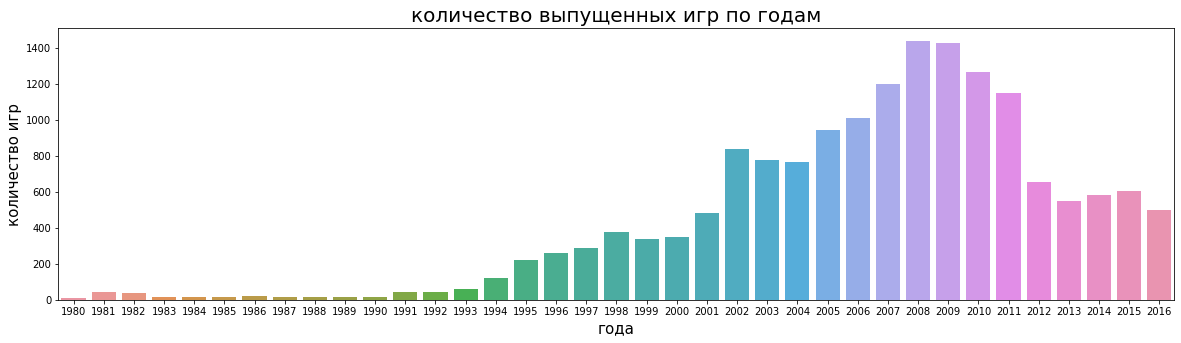

In [26]:
pvt0 = data.pivot_table(index='year_of_release', values='name', aggfunc='count')
plt.figure(figsize=(20,5))
plt.title('количество выпущенных игр по годам', fontsize=20)
sns.barplot(x=pvt0.index, y=pvt0['name'])
plt.xlabel('года',  fontsize=15)
plt.ylabel('количество игр',  fontsize=15)

Игры массово начинают выпускаться с 1995 года и достигают пика в 2008 году. Далее выпуск игр идет на спад.

### "Жизненный цикл" платформы

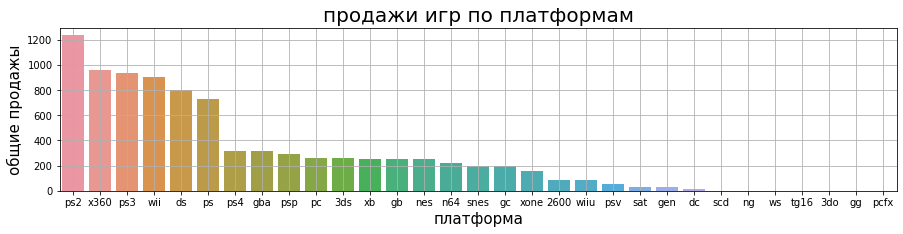

In [27]:
pvt = data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
plt.figure(figsize=(15,3))
plt.title('продажи игр по платформам', fontsize=20)
sns.barplot(x=pvt.index, y=pvt['total_sales'])
plt.xlabel('платформа',  fontsize=15)
plt.ylabel('общие продажы',  fontsize=15)
plt.grid(True)

In [28]:
# Самые популярные платформы
pvt.head(6)

,total_sales
platform,
ps2,1234.64
x360,962.87
ps3,932.70
wii,901.72
ds,803.29
ps,727.58


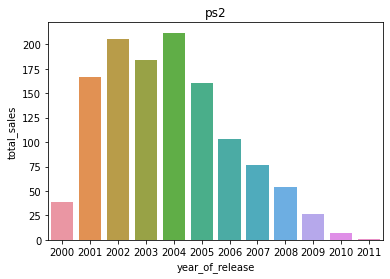

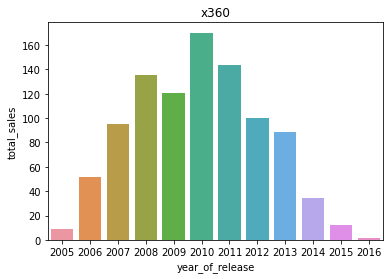

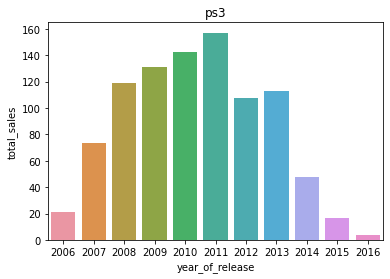

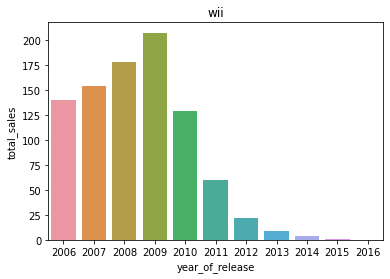

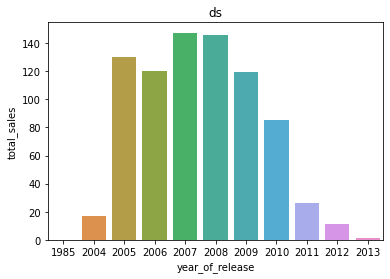

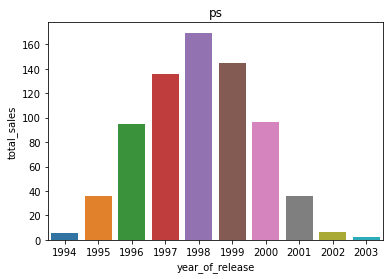

In [29]:
for i in pvt.reset_index()['platform'].head(6):
    pvt1 = data.query('platform == @i').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
    sns.barplot(x=pvt1.index, y=pvt1['total_sales'])
    plt.title(f'{i}')
    plt.show()

In [30]:
temp = data.copy() 
time_life = temp.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1 # в срок жизни платформы, должны входить границы диапазона, 
                                                            # поэтому +1
time_life['life'].median()

8.0

Можно заметить, что "средняя продолжительность жизни" платформы составляет 8 лет. Для прогноза на 2017 год будем рассматривать только данные за последние 4 года, то есть начиная с 2013 года. За это время можно проследить появление новых популярных платформ и пик популярности платформ, выпущенных в начале этого периода.

In [31]:
# Создадим переменную с нашими рассматриваемыми данными
actual_data = data.query('year_of_release >= 2013')

### Потенциально прибыльные платформы

In [32]:
pvt2 = actual_data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
pvt2 = pvt2.reset_index()
pvt2

,platform,total_sales
0,ps4,314.14
1,ps3,181.43
2,xone,159.32
3,3ds,143.25
4,x360,136.80
5,wiiu,64.63
6,pc,40.06
7,psv,32.99
8,wii,13.66
9,psp,3.74


In [33]:
actual_data.groupby(['platform', 'year_of_release'])['total_sales'].agg('sum')

platform  year_of_release
3ds       2013                56.57
          2014                43.76
          2015                27.78
          2016                15.14
ds        2013                 1.54
pc        2013                12.66
          2014                13.63
          2015                 8.52
          2016                 5.25
ps3       2013               113.25
          2014                47.76
          2015                16.82
          2016                 3.60
ps4       2013                25.99
          2014               100.00
          2015               118.90
          2016                69.25
psp       2013                 3.38
          2014                 0.24
          2015                 0.12
psv       2013                10.59
          2014                11.90
          2015                 6.25
          2016                 4.25
wii       2013                 8.59
          2014                 3.75
          2015                 1.14
  

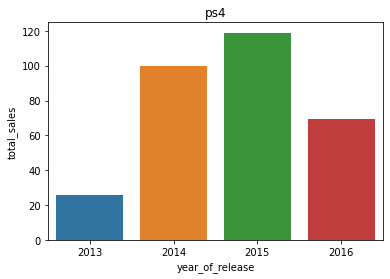

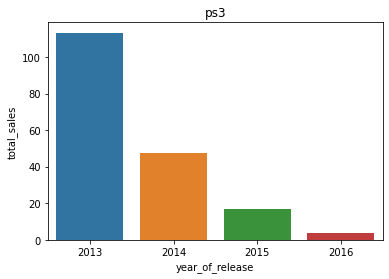

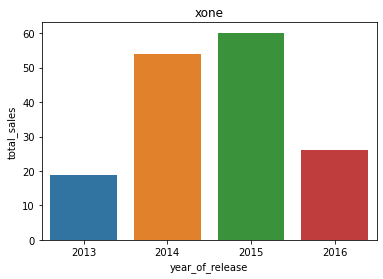

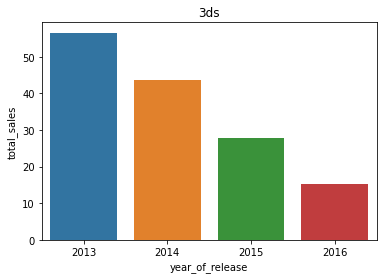

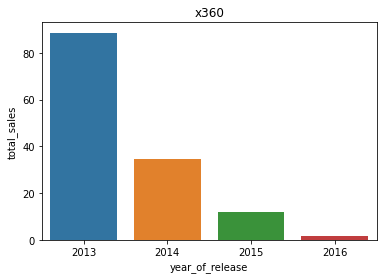

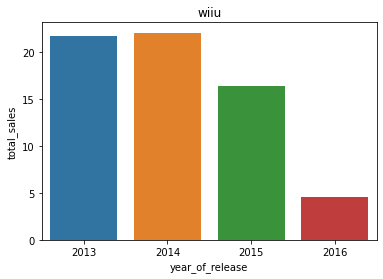

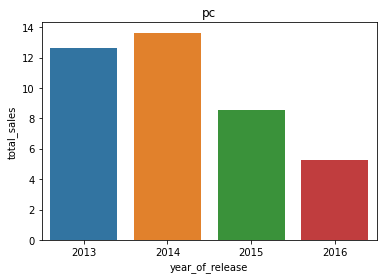

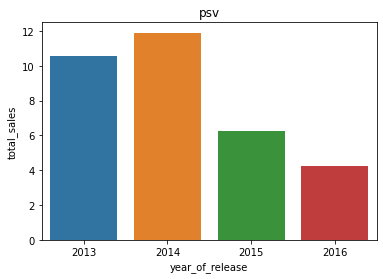

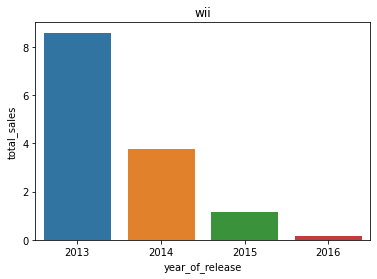

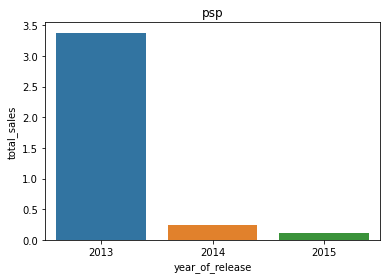

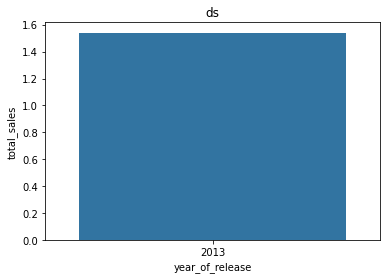

In [34]:
for i in pvt2['platform']:
    pvt3 = actual_data.query('platform == @i').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
    sns.barplot(x=pvt3.index, y=pvt3['total_sales'])
    plt.title(f'{i}')
    plt.show()

Можно заметить, что самые крупные по продажам платформы ps3 и x360 находятся в конце своего "жизненного цикла" и на 2016 год почти не имеют продаж, поэтому они не будут актуальными. То же самое происходит и с платформой wii. При этом такие платформы, как ps4, xone, wiiu только начинают набирать обороты. А платформы 3ds и pc имеют стабильные продажи на 2016 год. <b> Поэтому выделим эти пять платформ, как потэнциально прибыльные: ps4, xone, wiiu, 3ds и pc. <b>

In [35]:
actual_platform=['ps4', 'xone', 'wiiu', '3ds', 'pc']

<AxesSubplot:xlabel='total_sales', ylabel='platform'>

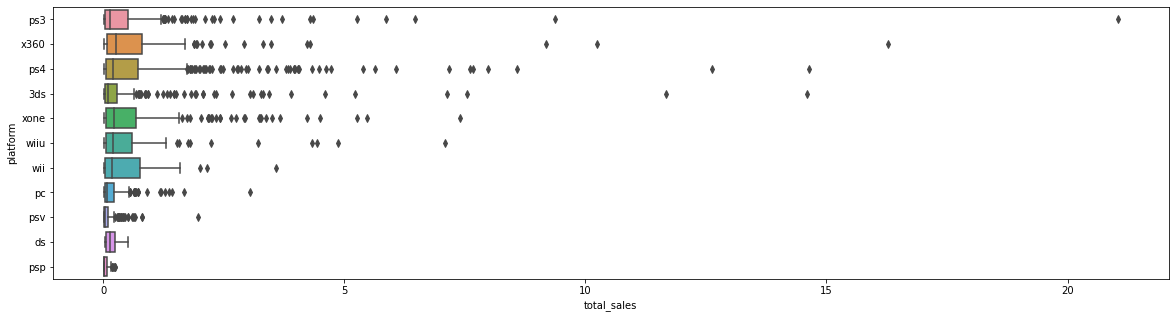

In [36]:
plt.figure(figsize=(20, 5))
sns.boxplot(x='total_sales', y='platform', data=actual_data)

<AxesSubplot:xlabel='total_sales', ylabel='platform'>

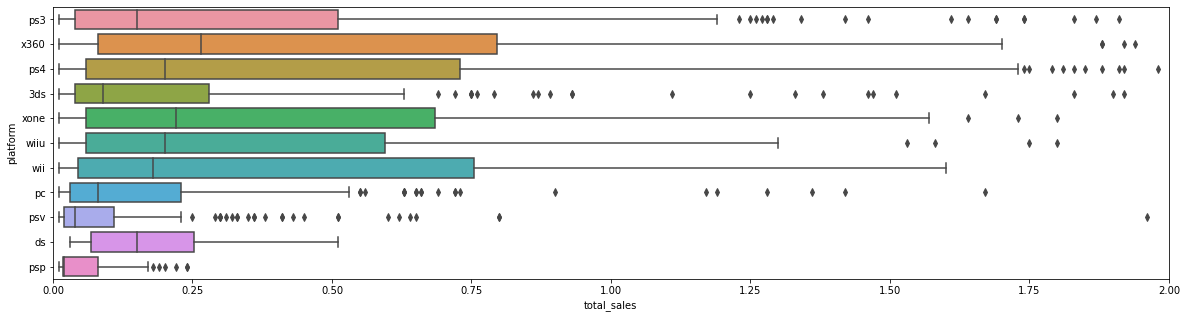

In [37]:
plt.figure(figsize=(20, 5))
plt.xlim(0,2)
sns.boxplot(x='total_sales', y='platform', data=actual_data)

По "ящику с усами" можно сделать вывод, что больше всего продаж имеют игры на x360, ps4, xone, wii и wiiu, так как их медиана находится дальше остальных.

В данном случае расположение боксплота и медианы показывают у какой платформы стабильно высокие продажи. Соответственно, Стримчик должен ориентироваться на такие платформы, так как какая игра в 2017 году выстрелит не известно.
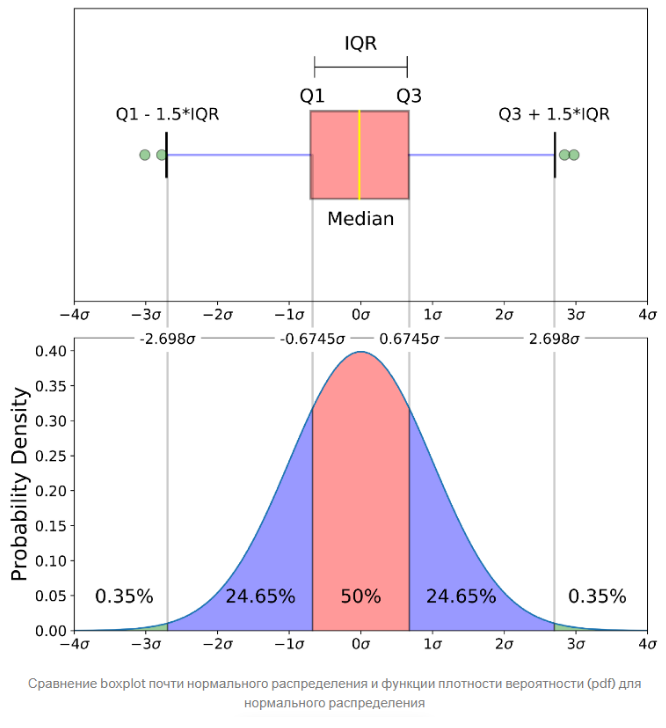

### Влияние отзывов

0.3132340515415155
-0.00260461720256464


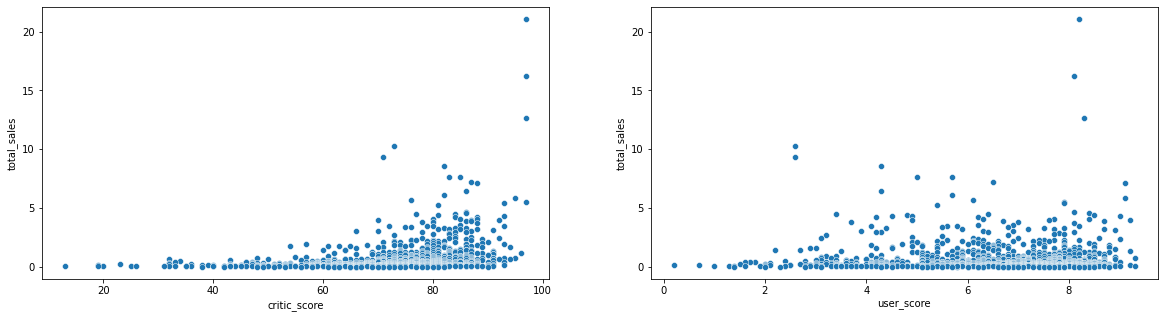

In [38]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x='critic_score', y='total_sales', data=actual_data)
plt.subplot(1, 2, 2)
sns.scatterplot(x='user_score', y='total_sales', data=actual_data)
print(actual_data['critic_score'].astype('float64').corr(actual_data['total_sales']))
print(actual_data['user_score'].astype('float64').corr(actual_data['total_sales']))

В общем случае можно сказать, что оценка пользователей никак не влияет на продажи, так как коэфицент Пирсона близок к нулю. Оценка критиков имеет небольшое положительное влияние.Теперь посмотрим на каждую платформу поотдельности.

ps4 critic: 0.40656790206178095
ps4 user: -0.031957110204556376


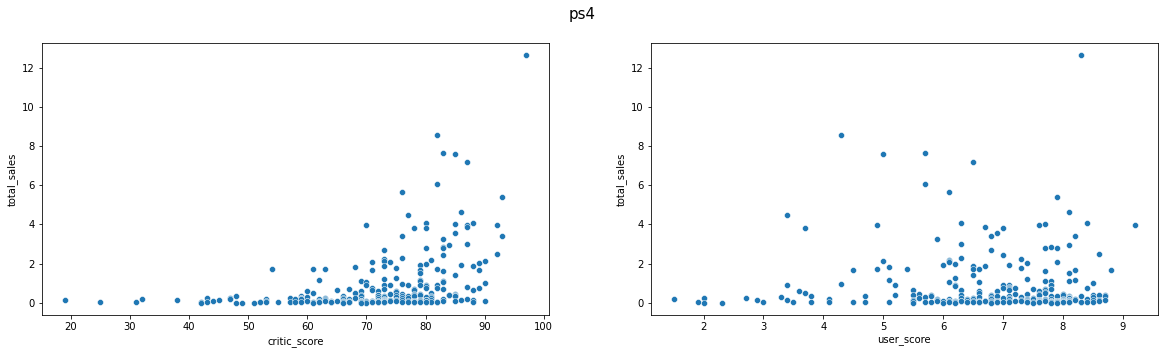

xone critic: 0.4169983280084017
xone user: -0.06892505328279414


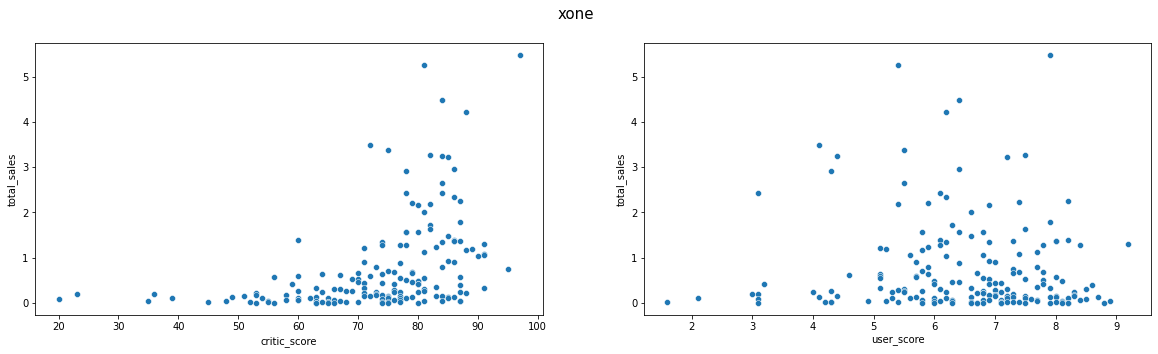

wiiu critic: 0.3764149065423912
wiiu user: 0.4193304819266187


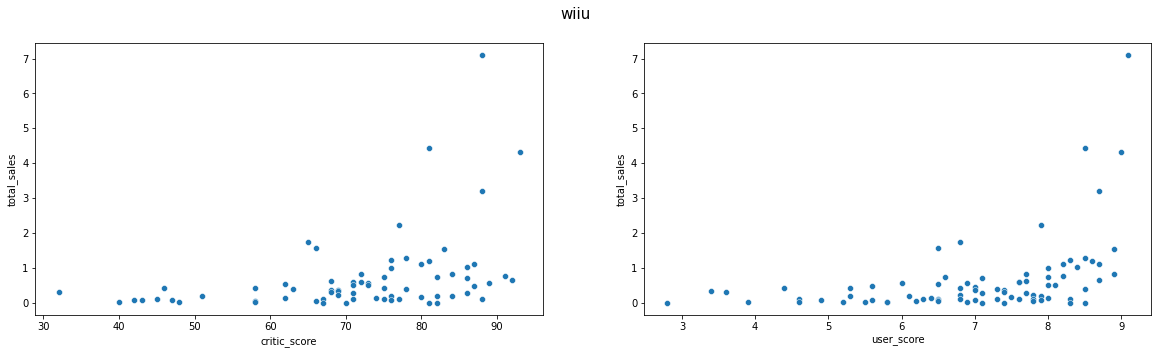

3ds critic: 0.3570566142288103
3ds user: 0.24150411773563016


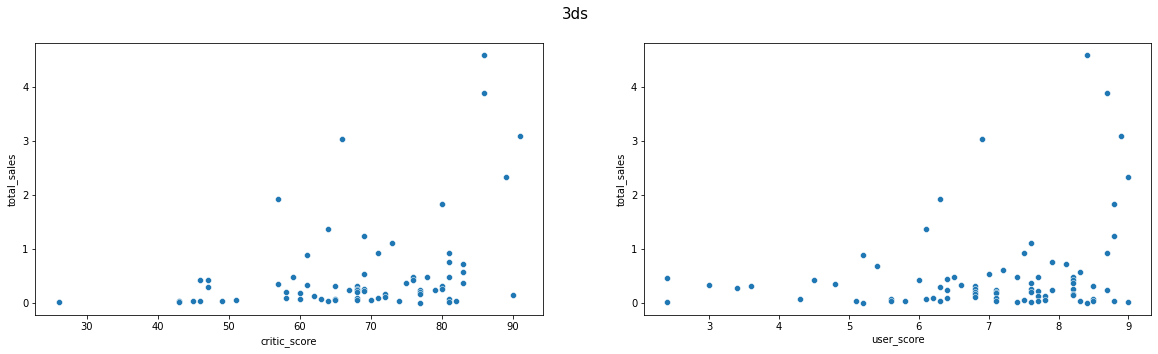

pc critic: 0.19965984836380182
pc user: -0.0899977567844875


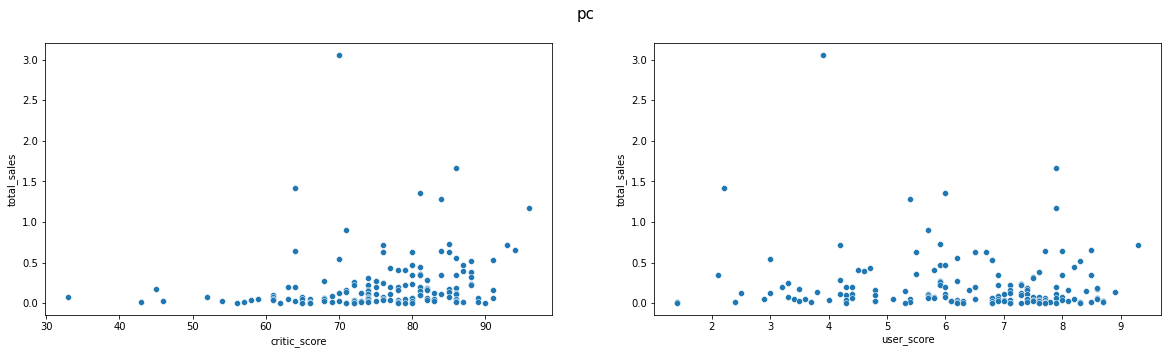

In [39]:
for i in actual_platform:
    plt.figure(figsize=(20, 5))
    plt.suptitle(i, fontsize=15)
    plt.subplot(1, 2, 1)
    sns.scatterplot(x='critic_score', y='total_sales', data=actual_data.query('platform==@i'))
    plt.subplot(1, 2, 2)
    sns.scatterplot(x='user_score', y='total_sales', data=actual_data.query('platform==@i'))
    print(i, 'critic:', actual_data.query('platform==@i')['critic_score'].astype('float64')
          .corr(actual_data.query('platform==@i')['total_sales']))
    print(i, 'user:', actual_data.query('platform==@i')['user_score'].astype('float64')
          .corr(actual_data.query('platform==@i')['total_sales']))
    plt.show()

Все платформы имеют примерно равное влияние оценки критиков на продажи. От оценки пользователей зависят только wiiu и 3ds.


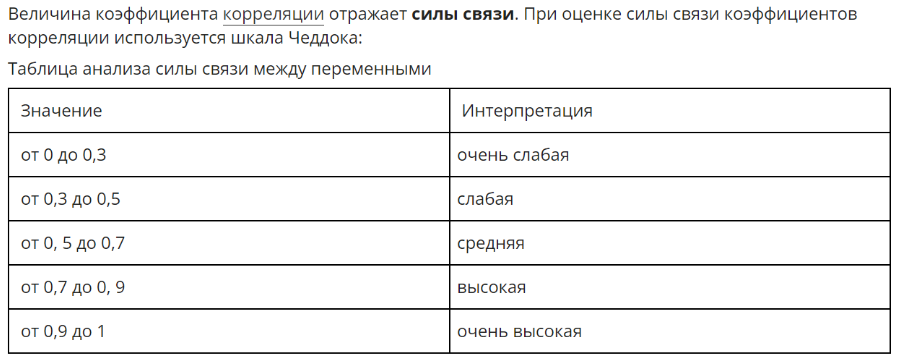

### Прибыльные жанры

<AxesSubplot:xlabel='genre', ylabel='total_sales'>

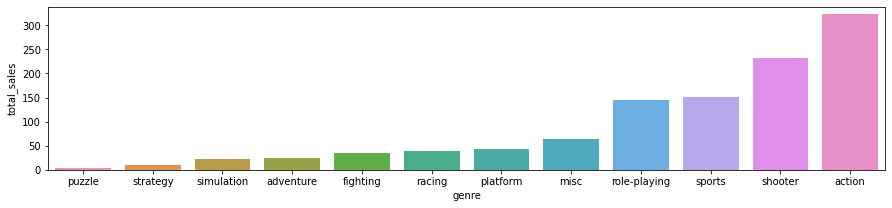

In [40]:
pvt4 = actual_data.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(by='total_sales')
plt.figure(figsize=(15,3))
sns.barplot(x=pvt4.index, y=pvt4['total_sales'])

По суммарным продажам топ-3 жанров занимают: <br>
1. action
2. shooter
3. role-playing
<br>Последнее место занимает жанр "puzzle"

<AxesSubplot:xlabel='genre', ylabel='total_sales'>

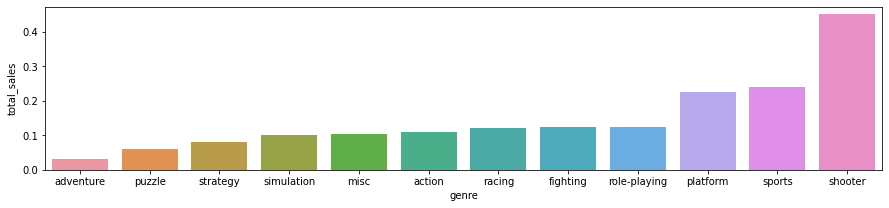

In [41]:
pvt4 = actual_data.pivot_table(index='genre', values='total_sales', aggfunc='median').sort_values(by='total_sales')
plt.figure(figsize=(15,3))
sns.barplot(x=pvt4.index, y=pvt4['total_sales'])

По медианным продажам одной игры в жанре топ-3 жанров занимают: <br>
1. shooter
2. sports
3. platform
<br>Последнее место занимает жанр "advanture"

<AxesSubplot:xlabel='genre', ylabel='total_sales'>

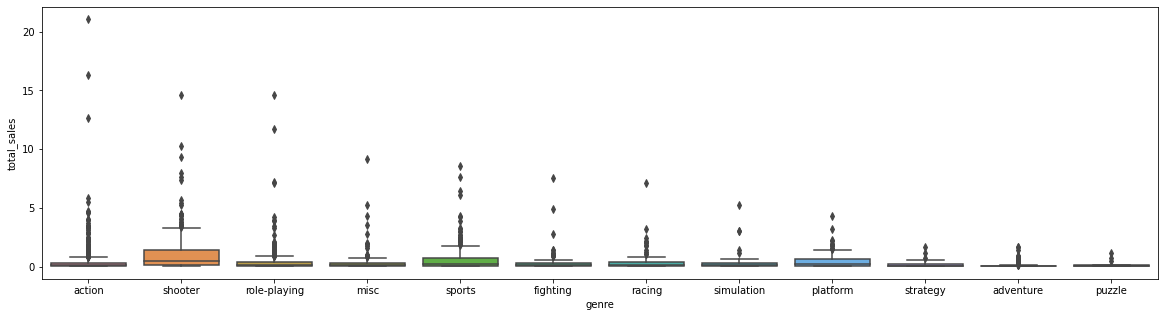

In [42]:
plt.figure(figsize=(20, 5))
sns.boxplot(x='genre', y='total_sales', data=actual_data)

<AxesSubplot:xlabel='genre', ylabel='total_sales'>

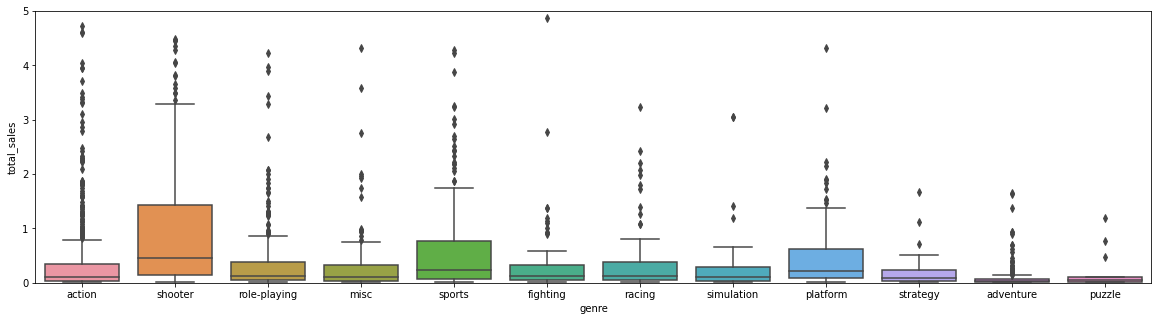

In [43]:
plt.figure(figsize=(20, 5))
plt.ylim(0,5)
sns.boxplot(x='genre', y='total_sales', data=actual_data)

Стабильные жанры это shooter и sports.

<b> Вывод: <br><br> Потенциально прибыльные платформы: ps4, xone, wiiu, 3ds и pc.<br><br> 
Самые прибыльные жанры: по общему значению - action, shooter, role-playing, по медианному значению - shooter, sports, platform.
    <br><br> Мнение критиков слабо влияет на продажи игры.

## Портрет пользователя каждого региона

### Топ-5 платформ

<AxesSubplot:xlabel='platform', ylabel='na_sales'>

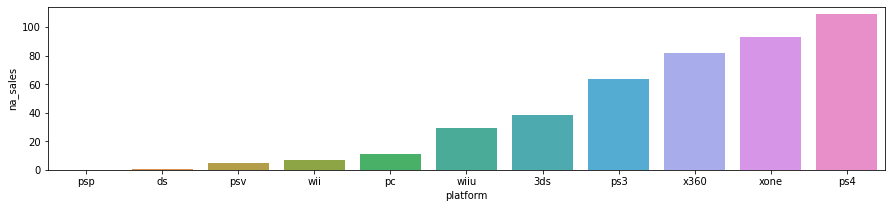

In [44]:
# NA
pvt4 = actual_data.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales')
plt.figure(figsize=(15,3))
sns.barplot(x=pvt4.index, y=pvt4['na_sales'])

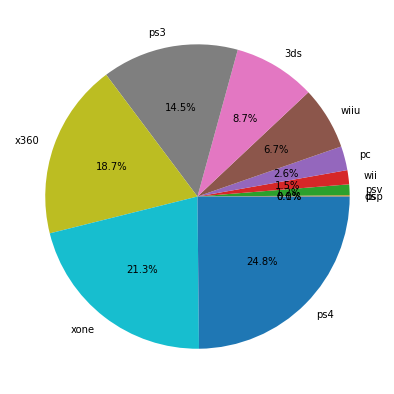

In [45]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1, 1, 1)
ax.pie(pvt4['na_sales'], labels=pvt4.index, autopct='%1.1f%%')
plt.show()

Топ-5 популярных платформ в Северной Америке:
1. ps4 - 24.8% продаж
2. xone - 21.3% продаж
3. x360 - 18.7% продаж 
4. ps3 - 14.5% продаж
5. 3ds - 8.7% продаж

<AxesSubplot:xlabel='platform', ylabel='eu_sales'>

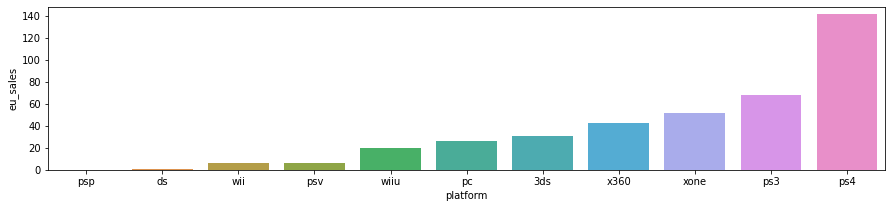

In [46]:
# EU
pvt4 = actual_data.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales')
plt.figure(figsize=(15,3))
sns.barplot(x=pvt4.index, y=pvt4['eu_sales'])

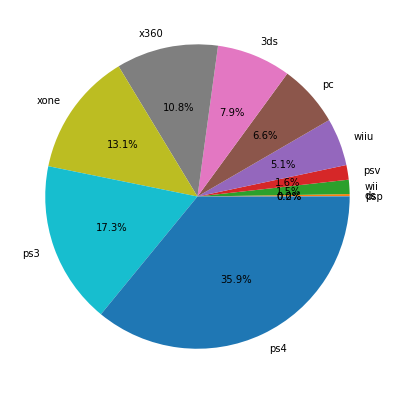

In [47]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1, 1, 1)
ax.pie(pvt4['eu_sales'], labels=pvt4.index, autopct='%1.1f%%')
plt.show()

Топ-5 популярных платформ в Европе:
1. ps4 - 35.9% продаж
2. ps3 - 17.3% продаж 
3. xone - 13.1% продаж
4. x360 - 10.8% продаж
5. 3ds - 7.9% продаж

<AxesSubplot:xlabel='platform', ylabel='jp_sales'>

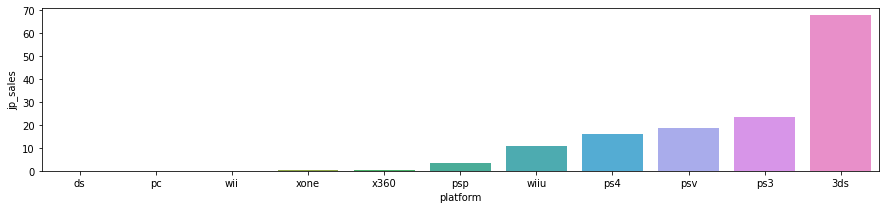

In [48]:
# JP
pvt4 = actual_data.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales')
plt.figure(figsize=(15,3))
sns.barplot(x=pvt4.index, y=pvt4['jp_sales'])

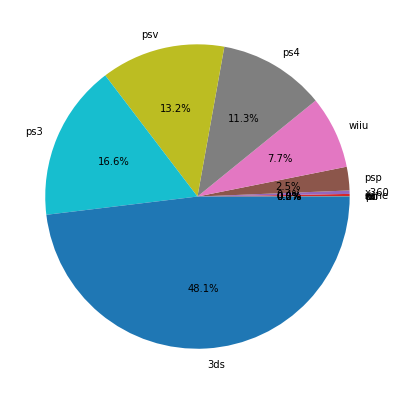

In [49]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1, 1, 1)
ax.pie(pvt4['jp_sales'], labels=pvt4.index, autopct='%1.1f%%')
plt.show()

Топ-5 популярных платформ в Японии:
1. 3ds - 48.1% продаж 
2. ps3 - 16.6% продаж
3. psv - 13.2% продаж
4. ps4 - 11.3% продаж
5. wiiu - 7.7% продаж

### Топ-5 жанров

<AxesSubplot:xlabel='genre', ylabel='na_sales'>

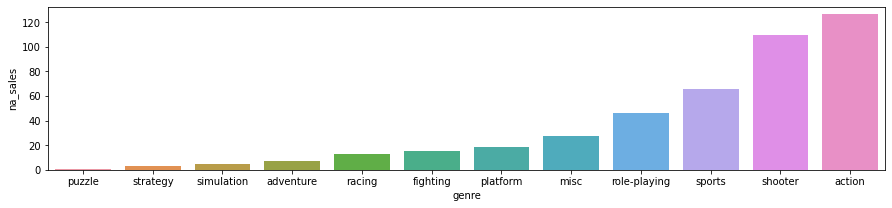

In [50]:
# NA
pvt4 = actual_data.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales')
plt.figure(figsize=(15,3))
sns.barplot(x=pvt4.index, y=pvt4['na_sales'])

Топ-5 жанров в Северной Америке:
1. action
2. shooter
3. sports
4. role-playing
5. misc

<AxesSubplot:xlabel='genre', ylabel='eu_sales'>

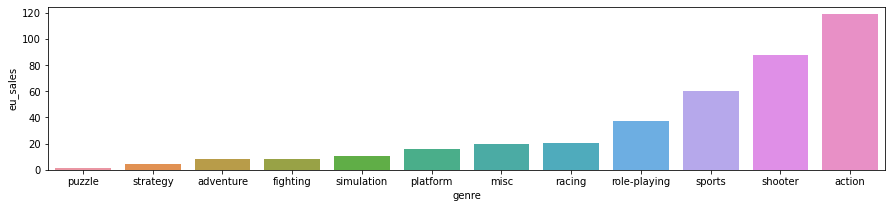

In [51]:
# EU
pvt4 = actual_data.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales')
plt.figure(figsize=(15,3))
sns.barplot(x=pvt4.index, y=pvt4['eu_sales'])

Топ-5 жанров в Европе:
1. action
2. shooter
3. sports
4. role-playing
5. racing

<AxesSubplot:xlabel='genre', ylabel='jp_sales'>

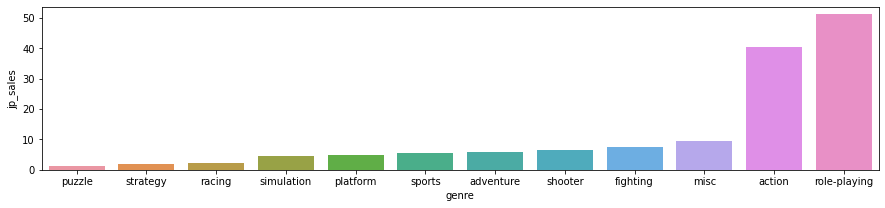

In [52]:
# JP
pvt4 = actual_data.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales')
plt.figure(figsize=(15,3))
sns.barplot(x=pvt4.index, y=pvt4['jp_sales'])

Топ-5 жанров в Японии:
1. role-playing
2. action
3. misc
4. fighting
5. platform

### Влияние рейтинга ESRB

<AxesSubplot:xlabel='rating', ylabel='na_sales'>

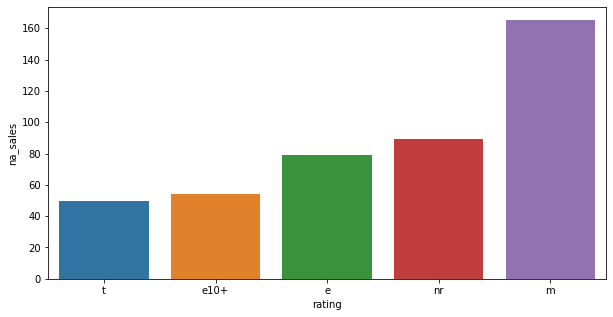

In [53]:
# NA
pvt4 = actual_data.pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values(by='na_sales')
plt.figure(figsize=(10,5))
sns.barplot(x=pvt4.index, y=pvt4['na_sales'])

<AxesSubplot:xlabel='rating', ylabel='eu_sales'>

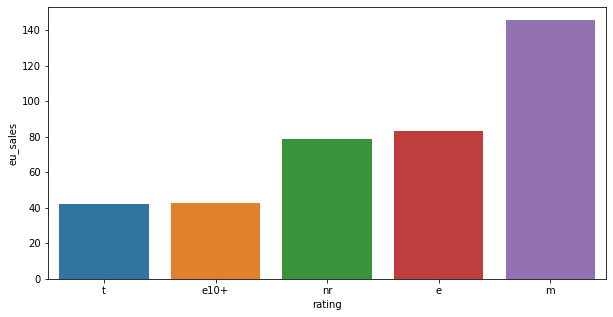

In [54]:
# EU
pvt4 = actual_data.pivot_table(index='rating', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales')
plt.figure(figsize=(10, 5))
sns.barplot(x=pvt4.index, y=pvt4['eu_sales'])

<AxesSubplot:xlabel='rating', ylabel='jp_sales'>

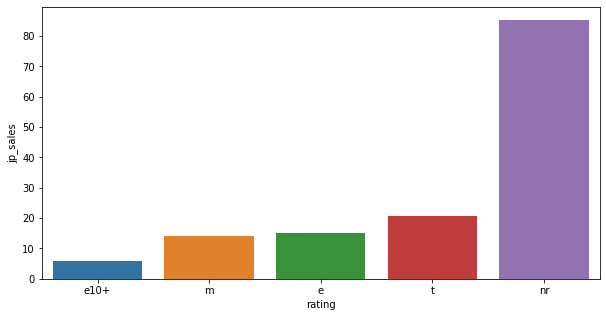

In [55]:
# JP
pvt4 = actual_data.pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales')
plt.figure(figsize=(10, 5))
sns.barplot(x=pvt4.index, y=pvt4['jp_sales'])

Больше всего продаж в Северной Америке и Европе имеют игры с рейтингом "для всех". В японии - "без рейтинга". Игры некоторых категорий имеют значительно меньше продаж в Европе и Северной Америке, чем другие, поэтому можно сделать вывод, что рейтинг влияет на продажи. В Японии рейтинг не влияет на продажи.

In [56]:
temp = actual_data.copy()
print(temp.rating.isna().sum(), temp.rating.isna().sum()/len(temp))
temp.rating.value_counts()

0 0.0


nr      978
m       372
t       333
e       302
e10+    252
Name: rating, dtype: int64

<b> Вывод: мы нашли самые популярные платформы и жанры в разых регионах, а также выделили рейтинг игр, имеющий самые большие продажи.

## Проверка гипотез

Возьмем альфу за общепринятую.

In [57]:
alpha = .05

Сравниваем средние значения двух выборок, не зависящих друг от друга, с вероятно разными дисперсиями, поэтому будем использовать ttest_ind.

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Надо проверить равны ли средний пользовательский рейтинг платформы xone и pc. Возьмем это утверждение за нулевую гипотезу, так как оно содержит равенство. Альтернативная гипотеза будет звучать как рейтинги разные, так как нам неважно больше или меньше у кого-то.

H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
<br> H1: Средние пользовательские рейтинги платформ Xbox One и PC разные

In [58]:
sample_1 = actual_data.query('platform=="xone" and not user_score.isna()')['user_score']
sample_2 = actual_data.query('platform=="pc" and not user_score.isna()')['user_score']
results = st.ttest_ind(sample_1, sample_2, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.16174359801784316
Не получилось отвергнуть нулевую гипотезу


<b> Итог: данные не противоречат нулевой гипотезе.

### Средние пользовательские рейтинги жанров Action и Sports разные

Надо проверить разные ли пользовательские рейтинги игр в жанрах action и sports. Для нулевой гипотезы предположим, что они равны, а для альтернативной, что разные.

H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые
<br> H1: Средние пользовательские рейтинги жанров Action и Sports разные

In [59]:
results = st.ttest_ind(actual_data.query('genre=="action" and not user_score.isna()')['user_score'],
                       actual_data.query('genre=="sports" and not user_score.isna()')['user_score'],
                       equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 1.3883444596405356e-20
Отвергаем нулевую гипотезу


<b> Итог: на уровне значимости 5% есть основания отвергнуть нулевую гипотезу о равенстве средних значений пользовательских рейтингов (отзывов) жанров Action и Sports в пользу альтернативной гипотезы.

## Общий вывод

<B> 
В этом проекте я исследовал данные о компьютерных играх до 2016 года.
<br><br>
На первом шаге я ознакомился с данными, выявил пропуски и неправильные типы данных в некоторых столбцах, некорректный регистр. <br><br>
Далее я провел предобработку данных: исправил типы данных, привел все к нижнему регистру, заполнил пропуски. 
<br><br>
Затем началось исследование. На примере самых популярных платформ, я обнаружил, что приставка исчезает через 11 лет после появления. На основании этого, я выделил актуальный период для исследования и предсказания на 2017 год. Актуальный период с 2011 по 2016 год. Затем я проанализировал рынок игр и зафиксировал потенциально прибыльные платформы, ими оказались: ps4, xone, wiiu, 3ds и pc. А также самые продаваемые жанры: action, shooter, role-playing, sports, platform. 
<br><br>
Для полноты картины, я изучил данные по разным регионам и составил партрет пользователя этих регионов. <br>
    Северная Америка: ПЛАТФОРМЫ: x360 ps3 ps4 xone 3ds ЖАНРЫ: action shooter sports<br>
    Европа: ПЛАТФОРМЫ: ps3 ps4 x360 3ds pc ЖАНРЫ: action shooter sports<br>
    Япония: ПЛАТФОРМЫ: 3ds ps3 ЖАНРЫ: role-playing action misc<br>
<br> И проверил некоторые теории. <br><br>
    Итог: Самые потенциально прибыльные игры - это игры на ps4 и xone, жанров shooter и action, с рейтингом "для всех" или "без рейтинга". Рекламировать их стоит в Европе и Северной Америке. Это портрет самых продаваемых игр в течении 4 лет до 2017. На рейтинг можно не обращать внимание, так как он имеет слабое влияние на продажи.